In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax
from math import isnan
df = pd.read_csv('../csvs/lab6.csv',encoding='cp1251')
print(df.head(5))

   id  gender  age  income     product
0   1    Male   19      15  cigarettes
1   2    Male   21      15        milk
2   3  Female   20      16   chocolate
3   4  Female   23      16        milk
4   5  Female   31      17       bread


In [50]:
np_df = df.to_numpy()
np_df = [[elem for elem in row[4:] if isinstance(elem,str)] for row in np_df]
print(np_df)

[['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocola

In [51]:
unique_items = df['product'].unique()
unique_items

array(['cigarettes', 'milk', 'chocolate', 'bread', 'water ', 'oil',
       'flakes ', 'tangerines'], dtype=object)

In [52]:
te = TransactionEncoder()
te_ary = te.fit_transform(np_df)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new.head()


,bread,chocolate,cigarettes,flakes,milk,oil,tangerines,water
0,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False


In [53]:
fpg = fpgrowth(df_new, min_support=0.03, use_colnames = True)
print(fpg.sort_values(by='support', ascending=False))
fpm = fpmax(df_new, min_support=0.03, use_colnames = True)
print(fpm.sort_values(by='support', ascending=False))

    support      itemsets
0  0.186869  (cigarettes)
4  0.181818      (water )
2  0.156566   (chocolate)
1  0.131313        (milk)
7  0.121212  (tangerines)
3  0.101010       (bread)
5  0.060606         (oil)
6  0.060606     (flakes )
    support      itemsets
7  0.186869  (cigarettes)
6  0.181818      (water )
5  0.156566   (chocolate)
4  0.131313        (milk)
3  0.121212  (tangerines)
2  0.101010       (bread)
0  0.060606     (flakes )
1  0.060606         (oil)


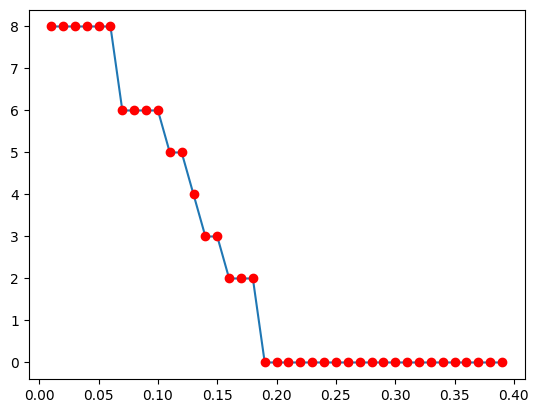

In [54]:
min_support_range = np.arange(0.01, 0.4, 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg))
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpg))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;

In [55]:
nlp_ru_df = pd.read_json("../csvs/nlp_beat.jsonl", lines=True)
nlp_ru_df.head(5)

,question_id,question,answer,topic,author,tour_name,tour_link
0,0,Фраза «You talkin' to me?» («Это ты мне сказал...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
1,1,Немецкая панк-рок группа «The Bates» взяла сво...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
2,2,Из-за обилия секса и насилия ЭТА экранизация б...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
3,3,"ЭТОТ фильм, основанный на автобиографическом п...",NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
4,4,В 2003 году ЭТОТ фильм режиссеров Фернанду Мей...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN



2. Переформировать нужную колонку;

In [56]:
ids = nlp_ru_df['question_id'].unique()
ids_tour_names = [[el for el in nlp_ru_df[nlp_ru_df['question_id'] == id]['tour_name']] for id in ids]
print(ids_tour_names[:10], '...')

[['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена']] ...



3. Вывести уникальное количество значений;

In [57]:
print("Кол-ва уникальных названий тура: ", len(nlp_ru_df['tour_name'].unique()), nlp_ru_df['tour_name'].unique())

Кол-ва уникальных названий тура:  4 ['Кубок хитрого собакена' 'Svoyachok' 'Тапир и Свояк'
 'Большой летний тройник']



4. Преобразовать данные к формату воспользовавшись TransactionEncoder;

In [58]:
te = TransactionEncoder()
te_ary = te.fit_transform(ids_tour_names)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
print(df_new)


     Svoyachok  Большой летний тройник  Кубок хитрого собакена  Тапир и Свояк
0        False                   False                    True          False
1        False                   False                    True          False
2        False                   False                    True          False
3        False                   False                    True          False
4        False                   False                    True          False
..         ...                     ...                     ...            ...
515      False                    True                   False          False
516      False                    True                   False          False
517      False                    True                   False          False
518      False                    True                   False          False
519      False                    True                   False          False

[520 rows x 4 columns]



5. Провести ассоциативный анализ с помощью алгоритмов FPGrowth и
FPmax.

In [59]:
nlp_fpg = fpgrowth(df_new, min_support=0.03, use_colnames = True)
print(nlp_fpg)

nlp_fpm = fpmax(df_new, min_support=0.03, use_colnames = True)
print("\n\n",nlp_fpm)

    support                  itemsets
0  0.644231  (Кубок хитрого собакена)
1  0.138462               (Svoyachok)
2  0.067308           (Тапир и Свояк)
3  0.150000  (Большой летний тройник)


     support                  itemsets
0  0.067308           (Тапир и Свояк)
1  0.138462               (Svoyachok)
2  0.150000  (Большой летний тройник)
3  0.644231  (Кубок хитрого собакена)


In [60]:
print(nlp_fpg)

    support                  itemsets
0  0.644231  (Кубок хитрого собакена)
1  0.138462               (Svoyachok)
2  0.067308           (Тапир и Свояк)
3  0.150000  (Большой летний тройник)


6. Визуализировать результаты двух методов.

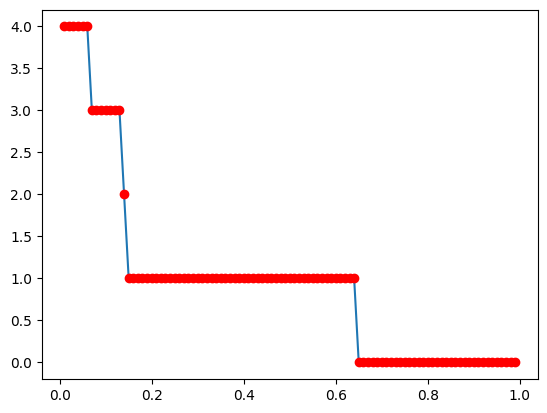

In [61]:
min_support_range = np.arange(0.01, 1., 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg))
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpg))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

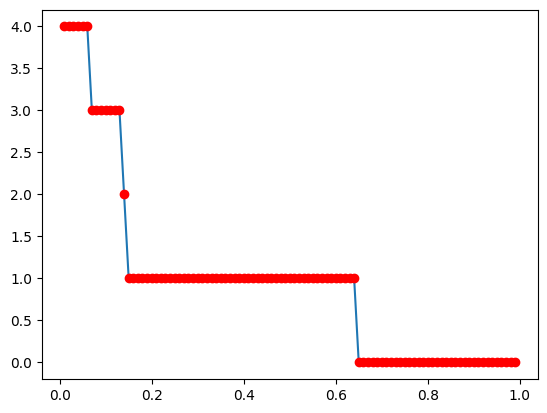

In [64]:
min_support_range = np.arange(0.01, 1., 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpm = fpmax(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpm))
    fpm['length'] = fpm['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpm['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpm))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

7. Описать разницу методов и результаты.
- В нашем примере алгоритмы отработали одинакова
# Когда результаты FPGrowth и FPMax будут отличаться
* Результаты FPGrowth и FPMax будут отличаться, когда существуют частые паттерны, которые являются подмножествами других частых паттернов. FPGrowth найдет все такие паттерны, тогда как FPMax отфильтрует их и оставит только максимальные.

* Например, если у нас есть частые паттерны {A, B}, {A, B, C}, {A, B, C, D}, FPMax оставит только {A, B, C, D}, так как это единственный максимальный паттерн.

# Преимущества и недостатки
* FPGrowth: 
1) Позволяет найти все частые паттерны. 
2) Может генерировать большое количество паттернов, что может быть сложно для анализа.


* FPMax:

1) Находит только максимальные частые паттерны, что уменьшает объем данных для анализа.
2) Может пропустить полезную информацию о частых подмножествах.